In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Crop.csv")

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [5]:
df.shape

(2200, 8)

In [6]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [10]:
cols=df.columns
for col in cols:
  if df[col].dtype==object:
    df[col] = lb.fit_transform(df[col])

display(df.head())

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 137.6 KB


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

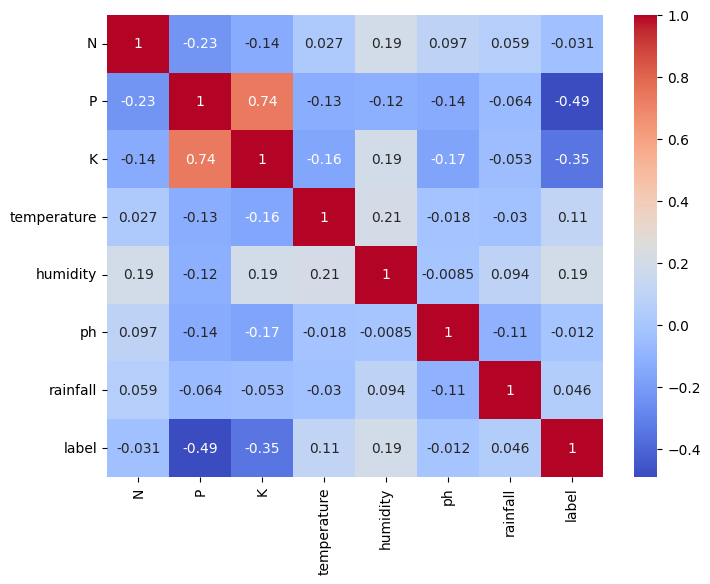

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

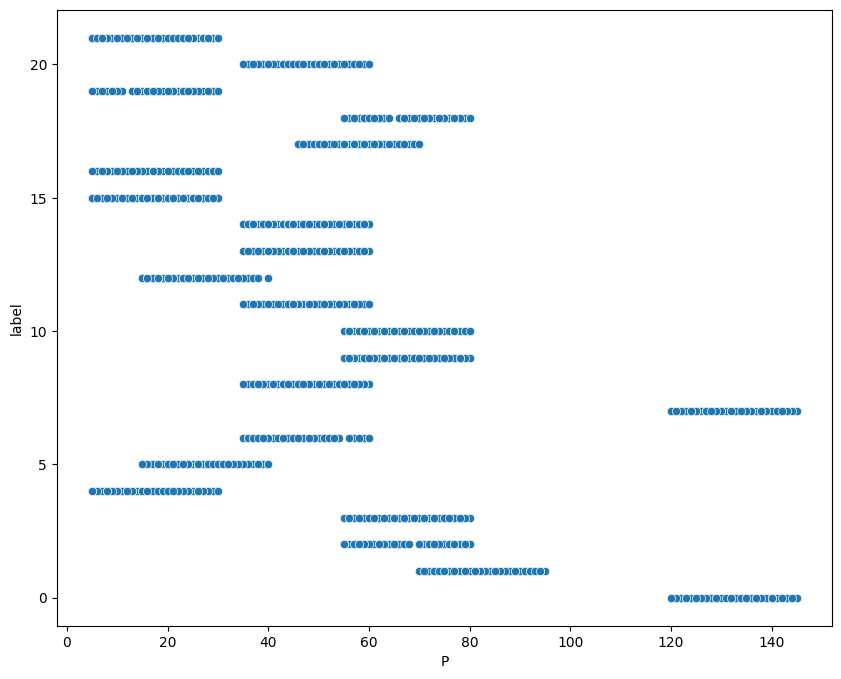

In [14]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='P',y='label',data=df)
plt.show()

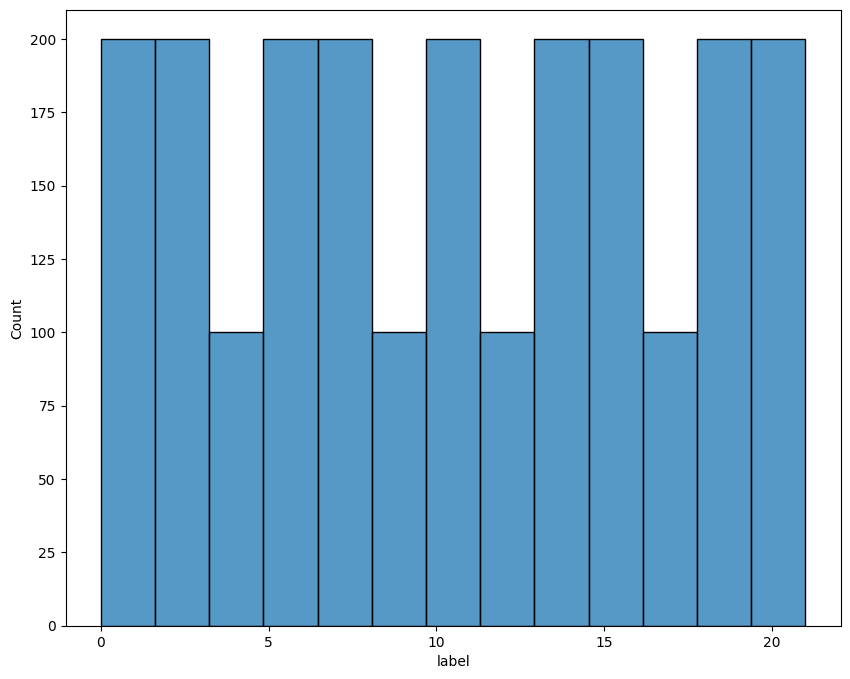

In [15]:
plt.figure(figsize=(10,8))
sns.histplot(x='label',data=df)
plt.show()

In [16]:
from scipy.stats import zscore
threshold=3
z_score=zscore(df)
print("values before outliers:",df.shape)
outliers=df[(abs(z_score>threshold).any(axis=1))]
df=df[(abs(z_score<=threshold).all(axis=1))]
print("values after outliers:",df.shape)

values before outliers: (2200, 8)
values after outliers: (2045, 8)


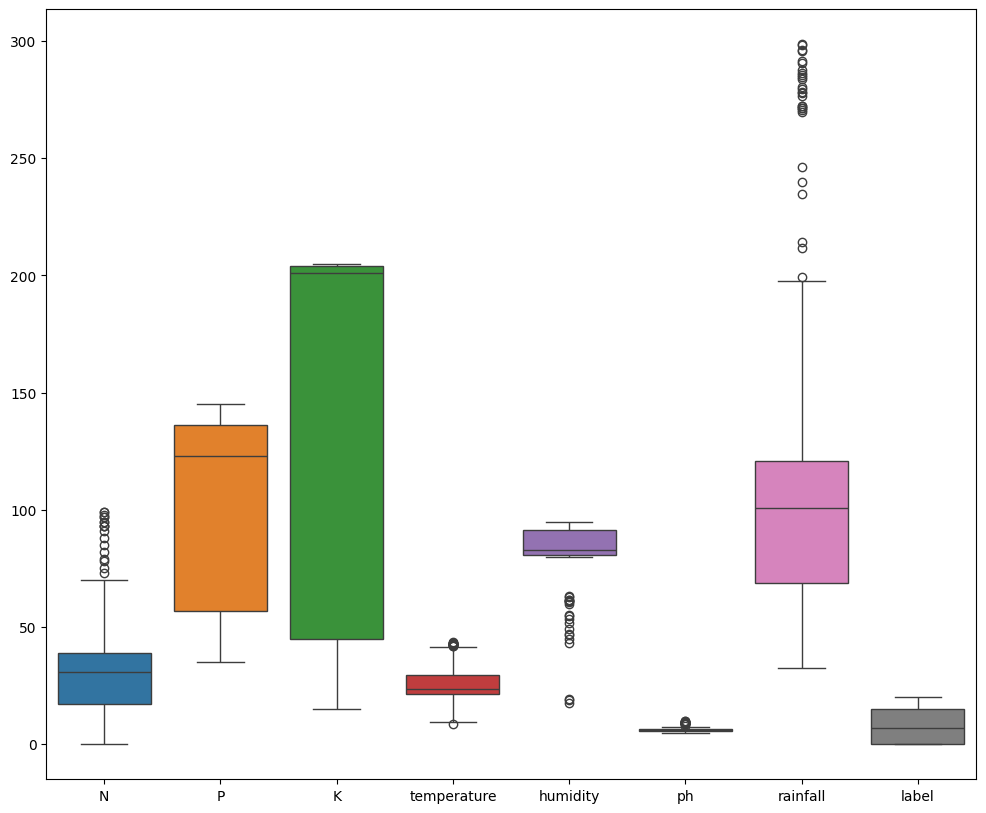

In [17]:
plt.figure(figsize=(12,10))
sns.boxplot(outliers)
plt.show()

In [18]:
df.corr()['label'].abs().sort_values(ascending=False)

,label
label,1.000000
P,0.464122
K,0.276363
humidity,0.231224
N,0.084053
temperature,0.075641
ph,0.051476
rainfall,0.013260


In [19]:
x=df.drop(['rainfall','label'],axis=1)
y=df['label']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [51]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train_sc,y_train)

LogisticRegression(max_iter=1000)

In [23]:
lr.score(x_train_sc,y_train)

0.923130677847659

In [24]:
lr.score(x_test_sc,y_test)

0.9039087947882736

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train_sc,y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
dt.score(x_train_sc,y_train)

1.0

In [27]:
dt.score(x_test_sc,y_test)

0.9462540716612378

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42,n_estimators=100)
rf.fit(x_train_sc,y_train)

RandomForestClassifier(random_state=42)

In [29]:
rf.score(x_train_sc,y_train)

1.0

In [30]:
rf.score(x_test_sc,y_test)

0.9609120521172638

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(random_state=42,n_estimators=100)
gb.fit(x_train_sc,y_train)


GradientBoostingClassifier(random_state=42)

In [32]:
gb.score(x_train_sc,y_train)

1.0

In [33]:
gb.score(x_test_sc,y_test)

0.9429967426710097

In [34]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train_sc,y_train)

SVC()

In [35]:
sv.score(x_train_sc,y_train)

0.9510831586303284

In [36]:
sv.score(x_test_sc,y_test)

0.9348534201954397

In [37]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=5)
kn.fit(x_train_sc,y_train)

KNeighborsClassifier()

In [38]:
kn.score(x_train_sc,y_train)

0.9559748427672956

In [39]:
kn.score(x_test_sc,y_test)

0.9234527687296417

In [40]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()
gn.fit(x_train_sc,y_train)

GaussianNB()

In [41]:
gn.score(x_train_sc,y_train)

0.9678546470999301

In [42]:
gn.score(x_test_sc,y_test)

0.9478827361563518

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score


In [44]:
model=[lr,dt,rf,gb,sv,kn,gn]
for models in model:
  y_pred=models.predict(x_test_sc)
  print(models)
  print("_"*30)
  print("Accuracy_score :",accuracy_score(y_test,y_pred))
  print("Precision_score :",precision_score(y_test,y_pred,average='weighted'))
  print("Recall_score :",recall_score(y_test,y_pred,average="weighted"))
  print("F1_score :",f1_score(y_test,y_pred,average="weighted"))
  print("-"*30)
  print(" ")

LogisticRegression()
______________________________
Accuracy_score : 0.9039087947882736
Precision_score : 0.900966227790439
Recall_score : 0.9039087947882736
F1_score : 0.9003747624731525
------------------------------
 
DecisionTreeClassifier(random_state=42)
______________________________
Accuracy_score : 0.9462540716612378
Precision_score : 0.9517004751163197
Recall_score : 0.9462540716612378
F1_score : 0.9468897214267398
------------------------------
 
RandomForestClassifier(random_state=42)
______________________________
Accuracy_score : 0.9609120521172638
Precision_score : 0.9618208783874218
Recall_score : 0.9609120521172638
F1_score : 0.9606778758799869
------------------------------
 
GradientBoostingClassifier(random_state=42)
______________________________
Accuracy_score : 0.9429967426710097
Precision_score : 0.9467204547663064
Recall_score : 0.9429967426710097
F1_score : 0.9438888203594195
------------------------------
 
SVC()
______________________________
Accuracy_score 

In [58]:
res=np.array([[80,67,50,35.89,85.63,7.95]])
ress=sc.transform(res)
print(rf.predict(ress))

[1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
